# The Data

In [1]:
df <- read.csv("transactionData.csv")

In [2]:
head(df)

,X,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,0,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47
2,1,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47
3,2,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48
4,3,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47
5,4,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47
6,5,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47


In [3]:
str(df)

'data.frame':	15006 obs. of  10 variables:
 $ X             : int  0 1 2 3 4 5 6 7 8 9 ...
 $ blockNumber   : int  15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 15627832 ...
 $ gas           : int  517689 517689 150000 71000 500000 469802 189922 69905 350000 21000 ...
 $ gasPrice      : num  5.70e+10 5.70e+10 3.00e+10 2.32e+10 2.00e+10 ...
 $ executionGas  : int  515877 515865 149356 71000 498176 458886 189202 68961 350000 21000 ...
 $ callDataUsage : int  1812 1824 644 0 1824 10916 720 944 0 0 ...
 $ callDataLength: int  458 458 138 2 458 2250 266 138 2 2 ...
 $ nonce         : int  7235 3140 11173680 5293 1 371 353 93 6925018 377 ...
 $ to            : num  6.97e+47 6.97e+47 7.79e+47 4.96e+47 6.97e+47 ...
 $ from          : num  6.99e+47 3.92e+47 1.44e+48 4.96e+47 4.25e+47 ...


In [4]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
df <-select(df,-X)

In [6]:
head(df)

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47
2,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47
3,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48
4,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47
5,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47
6,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47


# Univariate Distribution

In [7]:
library(ggplot2)

In [8]:
install.packages('qqplotr')

Installing package into 'C:/Users/matar/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'qqplotr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\matar\AppData\Local\Temp\RtmpYvq5Vz\downloaded_packages


In [9]:
library('qqplotr')

Warning message:
"package 'qqplotr' was built under R version 4.2.3"

Attaching package: 'qqplotr'


The following objects are masked from 'package:ggplot2':

    stat_qq_line, StatQqLine




In [8]:
group_callData <- function(x){
    if (x==0){
        return('0')
    }else if (x==64){
        return('64')
    }else if (x==204){
        return('204')
    }else if (x==264){
        return('264')
    }else if (x==608){
        return('608')
    }else if (x==680){
        return('680')
    }else if (x==976){
        return('976')
    }else if (x==1688){
        return('1688')
    }else if (x==1824){
        return('1824')
    }else{
        return('Other')      
    }
}

In [9]:
df$callDataUsageGroups<-as.factor(sapply(df$callDataUsage,group_callData))

In [31]:
dim(df)

[1] 15006    10

In [33]:
table(df$callDataUsageGroups)/dim(df)[1]


           0         1688         1824          204          264          608 
0.2634946022 0.0009329601 0.0026656004 0.0350526456 0.0040650407 0.0382513661 
          64          680          976        Other 
0.0163934426 0.0031320805 0.0060642410 0.6299480208 

### Distribution Plots

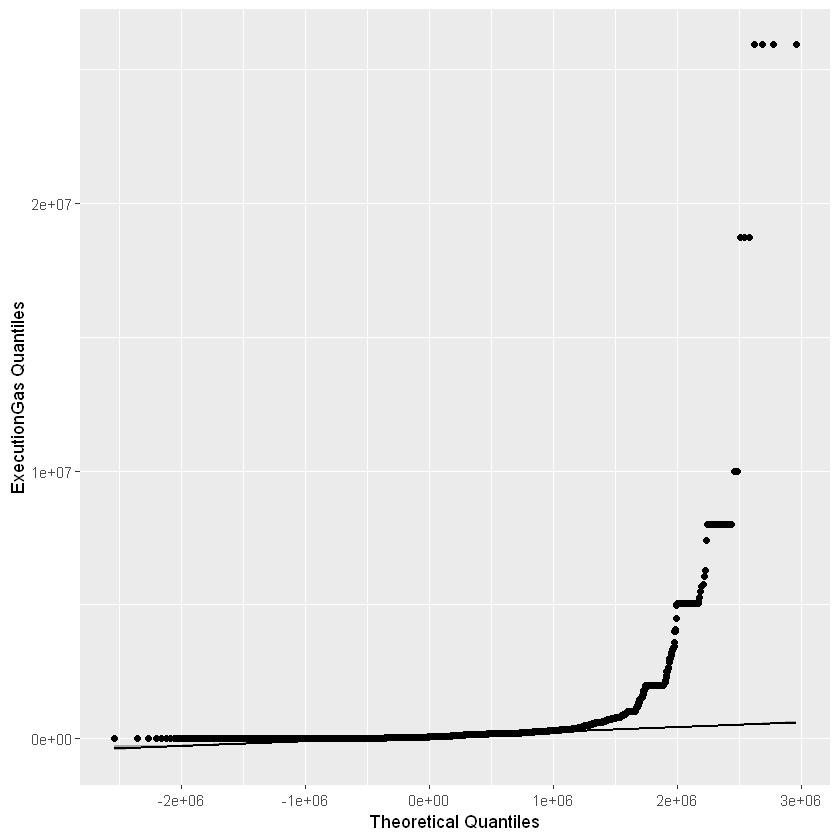

In [21]:
smp <- data.frame(norm = df$executionGas)
gg <- ggplot(data = smp, mapping = aes(sample = norm)) +
    stat_qq_band() +
    stat_qq_line() +
    stat_qq_point() +
    labs(x = "Theoretical Quantiles", y = "ExecutionGas Quantiles")
gg

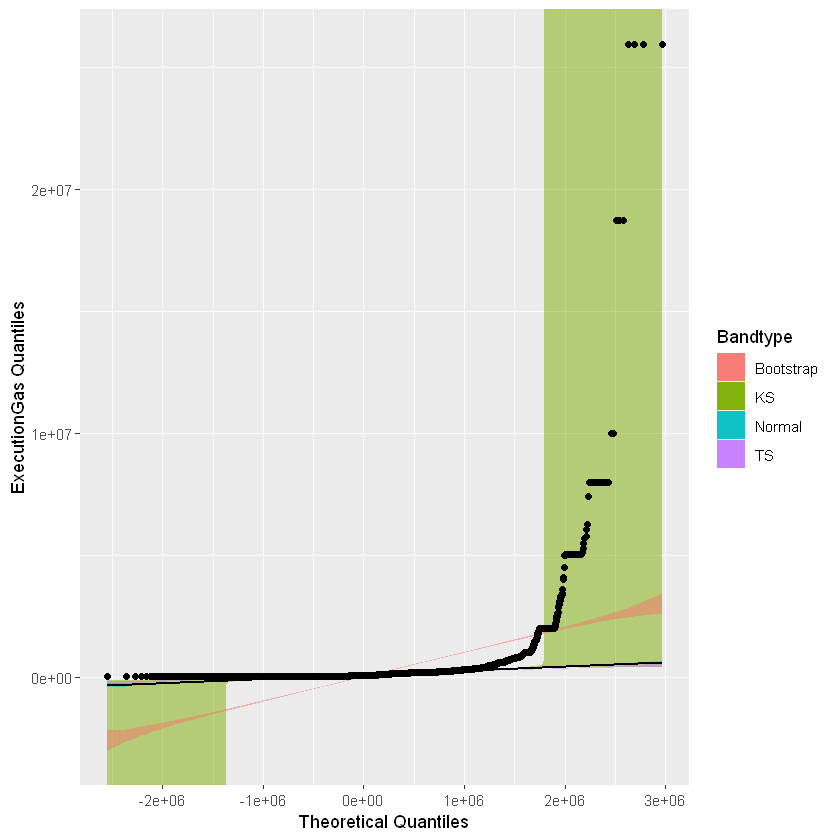

In [22]:
gg <- ggplot(data = smp, mapping = aes(sample = norm)) +
    geom_qq_band(bandType = "ks", mapping = aes(fill = "KS"), alpha = 0.5) +
    geom_qq_band(bandType = "ts", mapping = aes(fill = "TS"), alpha = 0.5) +
    geom_qq_band(bandType = "pointwise", mapping = aes(fill = "Normal"), alpha = 0.5) +
    geom_qq_band(bandType = "boot", mapping = aes(fill = "Bootstrap"), alpha = 0.5) +
    stat_qq_line() +
    stat_qq_point() +
    labs(x = "Theoretical Quantiles", y = "ExecutionGas Quantiles") +
    scale_fill_discrete("Bandtype")
gg

Clearly the distribution is not normal

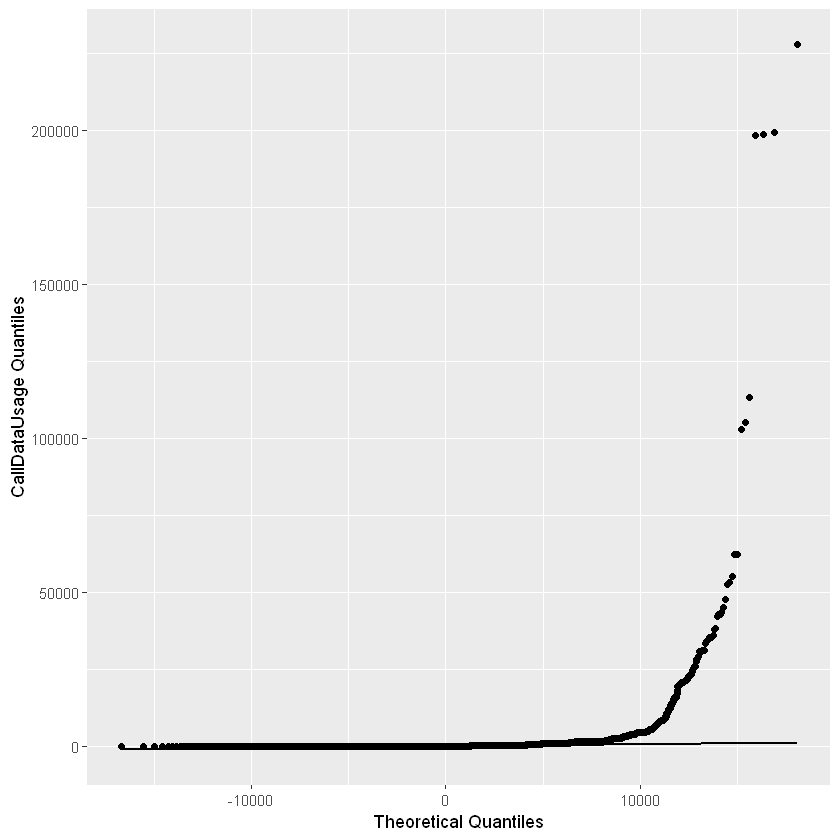

In [27]:
smp <- data.frame(norm = df$callDataLength)
gg <- ggplot(data = smp, mapping = aes(sample = norm)) +
    stat_qq_band() +
    stat_qq_line() +
    stat_qq_point() +
    labs(x = "Theoretical Quantiles", y = "CallDataUsage Quantiles")
gg

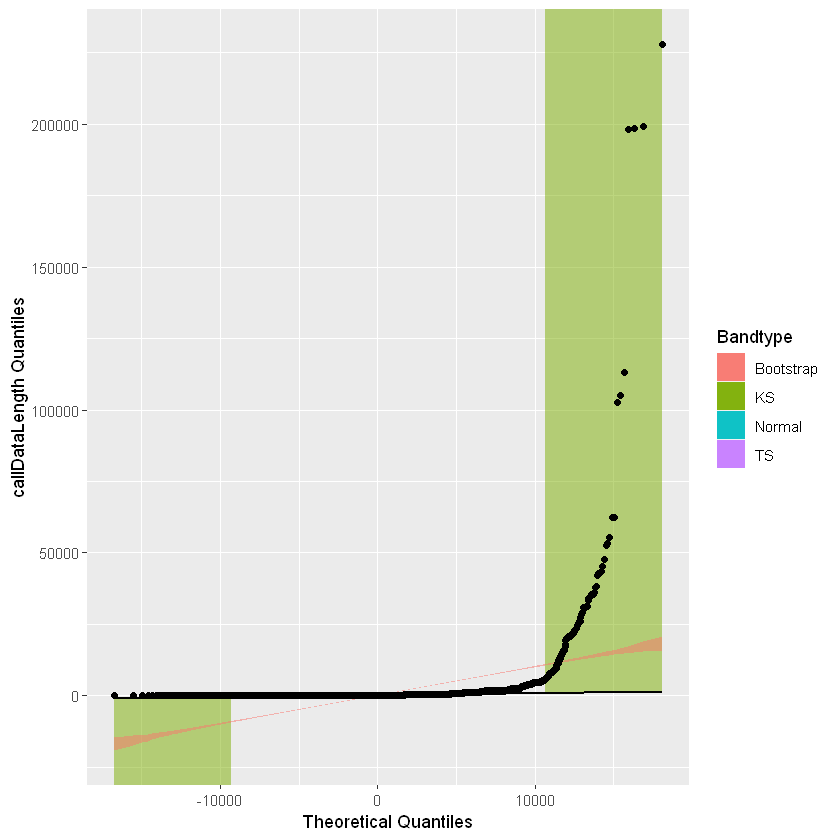

In [30]:
gg <- ggplot(data = smp, mapping = aes(sample = norm)) +
    geom_qq_band(bandType = "ks", mapping = aes(fill = "KS"), alpha = 0.5) +
    geom_qq_band(bandType = "ts", mapping = aes(fill = "TS"), alpha = 0.5) +
    geom_qq_band(bandType = "pointwise", mapping = aes(fill = "Normal"), alpha = 0.5) +
    geom_qq_band(bandType = "boot", mapping = aes(fill = "Bootstrap"), alpha = 0.5) +
    stat_qq_line() +
    stat_qq_point() +
    labs(x = "Theoretical Quantiles", y = "callDataLength Quantiles") +
    scale_fill_discrete("Bandtype")
gg

In [31]:
# Fall 20121 gamma for call data : 0.158,0.000322

In [32]:
dim(df)

[1] 15006     9

In [34]:
install.packages('mixtools')

Installing package into 'C:/Users/matar/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'kernlab', 'segmented'




package 'kernlab' successfully unpacked and MD5 sums checked
package 'segmented' successfully unpacked and MD5 sums checked
package 'mixtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\matar\AppData\Local\Temp\RtmpYvq5Vz\downloaded_packages


In [16]:
library(mixtools)

Warning message:
"package 'mixtools' was built under R version 4.2.3"
mixtools package, version 2.0.0, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




### Mixture Normal for Execution Gas

In [69]:
mixmdl = normalmixEM(log(df$executionGas), k=2, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 13475.93  log-lik = -22886.59 
            [,1]        [,2]
lambda  0.918859  0.08114103
mu     11.436701 11.87587279
sigma   1.110414  1.21114941
iteration = 2  log-lik diff = 46.83166  log-lik = -22839.75 
             [,1]        [,2]
lambda  0.9173379  0.08266211
mu     11.4464997 11.95524528
sigma   1.0799616  1.32622474
iteration = 3  log-lik diff = 41.41581  log-lik = -22798.34 
             [,1]        [,2]
lambda  0.9153446  0.08465541
mu     11.4342725 12.07852116
sigma   1.0547197  1.45114835
iteration = 4  log-lik diff = 17.35907  log-lik = -22780.98 
            [,1]        [,2]
lambda  0.915102  0.08489802
mu     11.421667 12.20432622
sigma   1.038434  1.51086959
iteration = 5  log-lik diff = 6.44352  log-lik = -22774.54 
             [,1]        [,2]
lambda  0.9163571  0.08364286
mu     11.4130102 12.30287727
sigma   1.0313195  1.52709971
iteration = 6  log-lik diff = 3.154969  log-lik = -22771.38 
             [,1]        [,2]
lambda  0.918

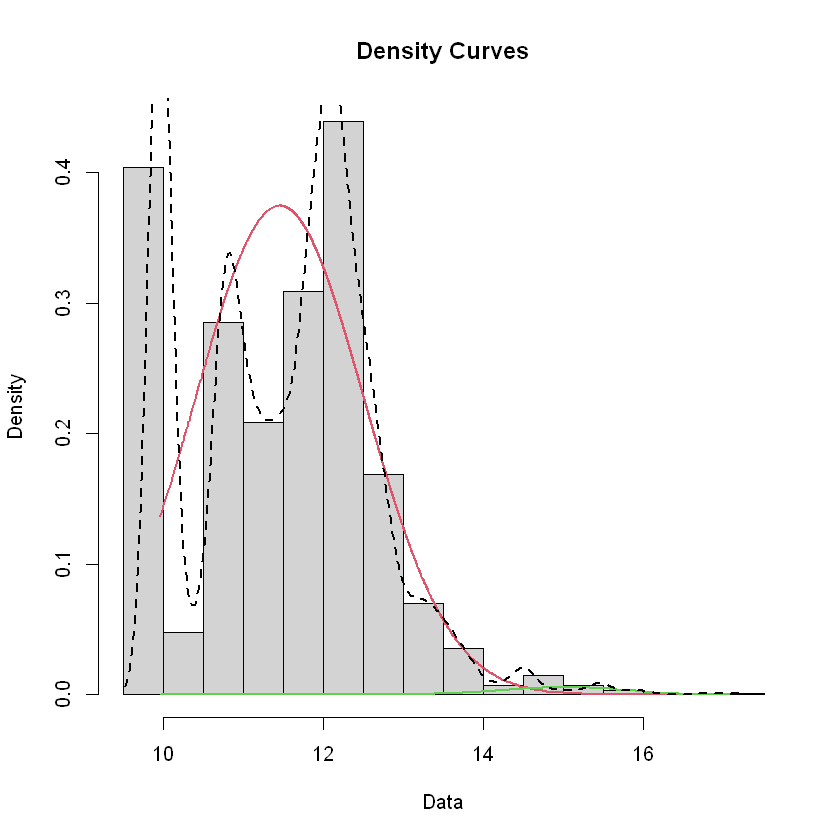

In [60]:
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)

In [70]:
png(file="2mixturenormExeGas.png")
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2

In [61]:
mixmdl = normalmixEM(log(df$executionGas), k=3, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 4148.133  log-lik = -22869.44 
             [,1]       [,2]       [,3]
lambda  0.3624709  0.2908006  0.3467285
mu     11.0929157 11.4608848 11.7874203
sigma   1.0301491  0.9656107  1.2896630
iteration = 2  log-lik diff = 34.88912  log-lik = -22834.55 
             [,1]       [,2]       [,3]
lambda  0.3625741  0.2963174  0.3411085
mu     11.1470130 11.4944261 11.8383901
sigma   0.9901584  0.9656884  1.2446795
iteration = 3  log-lik diff = 3.483949  log-lik = -22831.06 
             [,1]       [,2]       [,3]
lambda  0.3654868  0.2976716  0.3368417
mu     11.1444748 11.4938720 11.8522953
sigma   0.9777365  0.9759033  1.2379846
iteration = 4  log-lik diff = 1.971421  log-lik = -22829.09 
             [,1]       [,2]       [,3]
lambda  0.3680527  0.2989097  0.3330375
mu     11.1393128 11.4930572 11.8659336
sigma   0.9715600  0.9832130  1.2345998
iteration = 5  log-lik diff = 1.371813  log-lik = -22827.72 
             [,1]       [,2]      [,3]
lambda  0.370381

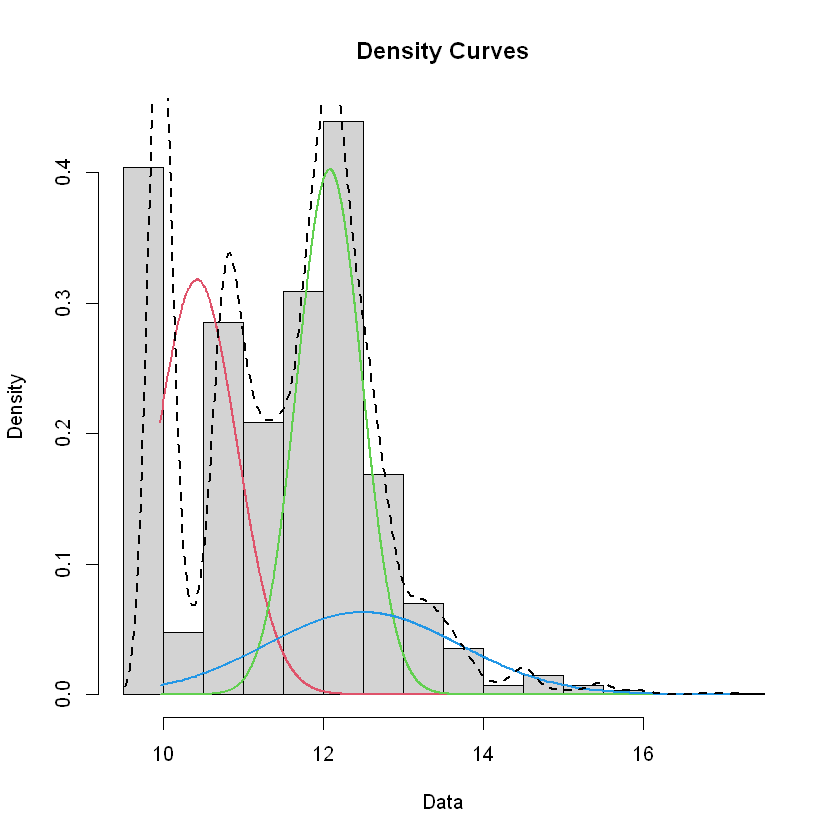

In [64]:
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)

In [62]:
png(file="3mixturenormExeGas.png")
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2

In [67]:
mixmdl = normalmixEM(log(df$executionGas), k=4, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 14176.42  log-lik = -22380.9 
             [,1]       [,2]       [,3]       [,4]
lambda  0.3497482  0.2734975  0.2541848  0.1225695
mu     10.4346172 11.3716679 12.3466082 12.9264110
sigma   0.5169235  1.1919876  0.2997436  0.8361407
iteration = 2  log-lik diff = 619.0663  log-lik = -21761.83 
             [,1]      [,2]       [,3]       [,4]
lambda  0.3346402  0.289064  0.2711300  0.1051658
mu     10.4486275 11.501847 12.2387377 12.8211448
sigma   0.5298751  1.106416  0.3035311  0.9525380
iteration = 3  log-lik diff = 217.2375  log-lik = -21544.59 
             [,1]       [,2]       [,3]       [,4]
lambda  0.3318170  0.2872949  0.2804417  0.1004464
mu     10.4303184 11.5494075 12.1871464 12.8531258
sigma   0.5231375  1.0198993  0.3037351  1.0981240
iteration = 4  log-lik diff = 80.51339  log-lik = -21464.08 
             [,1]       [,2]      [,3]        [,4]
lambda  0.3293670  0.2872685  0.283661  0.09970352
mu     10.4026783 11.5806823 12.163081 12.89159

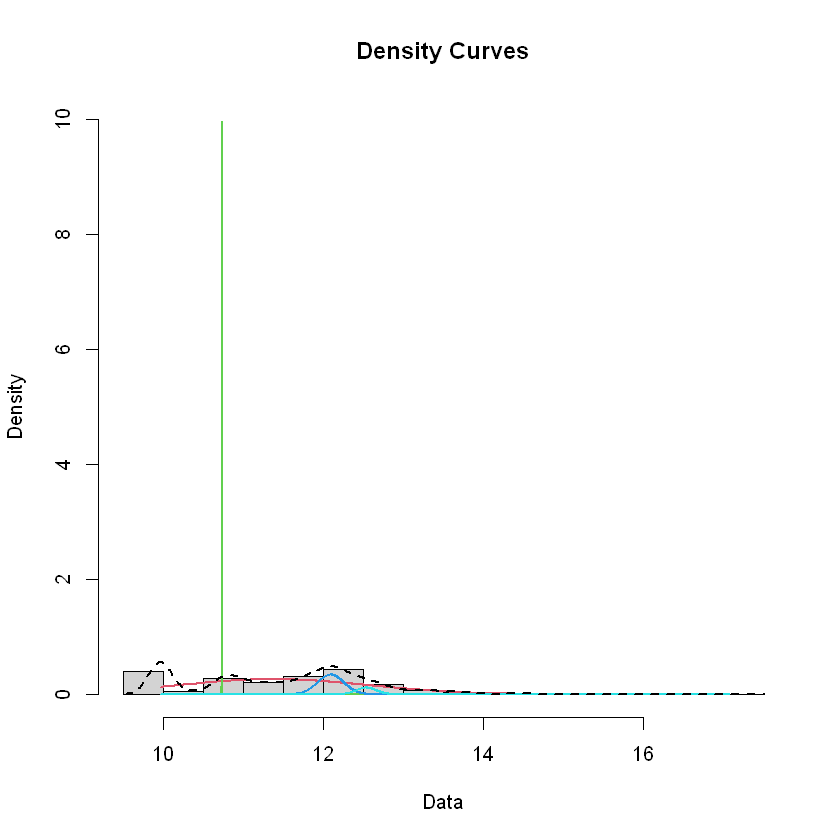

In [66]:
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)

In [68]:
png(file="4mixturenormExeGas.png")
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2

k=3 seems to works better visually.

### Mixture Normal for Call Data

In [72]:
mixmdl = normalmixEM(df$callDataUsage, k=2, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 49835.54  log-lik = -138980.5 
              [,1]         [,2]
lambda   0.8010317 1.989683e-01
mu     371.0599139 7.207670e+03
sigma  703.6054109 5.972120e+04
iteration = 2  log-lik diff = 2510.406  log-lik = -136470.1 
              [,1]         [,2]
lambda   0.8557817 1.442183e-01
mu     731.4487828 1.426220e+04
sigma  797.6385765 6.956246e+04
iteration = 3  log-lik diff = 384.0742  log-lik = -136086 
              [,1]         [,2]
lambda   0.8779759 1.220241e-01
mu     830.4442035 1.763091e+04
sigma  883.0473916 7.537412e+04
iteration = 4  log-lik diff = 79.8523  log-lik = -136006.2 
              [,1]         [,2]
lambda   0.8886664 1.113336e-01
mu     874.2932162 1.944340e+04
sigma  929.6270322 7.876307e+04
iteration = 5  log-lik diff = 10.53464  log-lik = -135995.6 
              [,1]         [,2]
lambda   0.8923385 1.076615e-01
mu     890.0170456 2.015449e+04
sigma  947.9828329 8.003917e+04
iteration = 6  log-lik diff = 1.293849  log-lik = -135994.

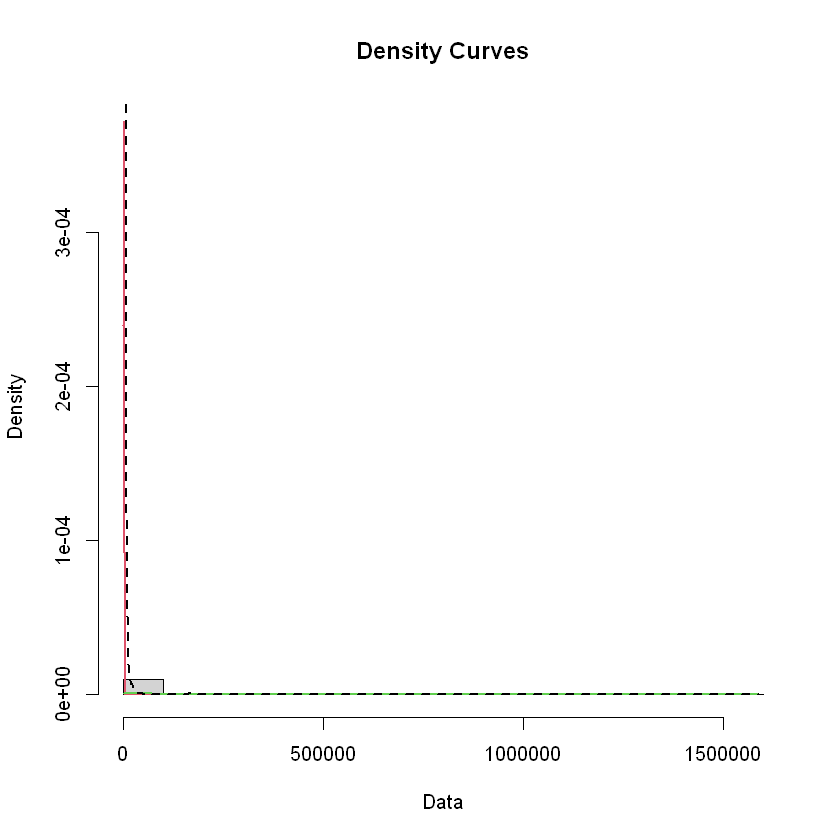

In [74]:
plot(mixmdl, which=2)
lines(density(df$callDataUsage), lty=2,lwd=2)

## Mixture Gamma for Exec. Gas

In [82]:
mixmdl = gammamixEM(log(df$executionGas), lambda = NULL, alpha = NULL, beta = NULL, k = 2,
           mom.start = TRUE, fix.alpha = FALSE, epsilon = 1e-08, 
           maxit = 1000, maxrestarts = 20, verb = TRUE)

One of the variances is going to zero;  trying new starting values.
number of iterations= 254 
iteration = 1  log-lik diff = 16202.82  log-lik = -59157.48 
iteration = 2  log-lik diff = 6233.754  log-lik = -52923.72 
iteration = 3  log-lik diff = 3596.168  log-lik = -49327.56 
iteration = 4  log-lik diff = 2473.119  log-lik = -46854.44 
iteration = 5  log-lik diff = 1866.534  log-lik = -44987.9 
iteration = 6  log-lik diff = 1490.551  log-lik = -43497.35 
iteration = 7  log-lik diff = 1235.979  log-lik = -42261.37 
iteration = 8  log-lik diff = 1052.639  log-lik = -41208.73 
iteration = 9  log-lik diff = 914.5486  log-lik = -40294.19 
iteration = 10  log-lik diff = 806.9195  log-lik = -39487.27 
iteration = 11  log-lik diff = 720.7387  log-lik = -38766.53 
iteration = 12  log-lik diff = 650.1949  log-lik = -38116.33 
iteration = 13  log-lik diff = 591.4779  log-lik = -37524.85 
iteration = 14  log-lik diff = 541.806  log-lik = -36983.05 
iteration = 15  log-lik diff = 499.2673  log-lik

In [84]:
mixmdl = gammamixEM(log(df$executionGas), lambda = NULL, alpha = NULL, beta = NULL, k = 3,
           mom.start = TRUE, fix.alpha = FALSE, epsilon = 1e-08, 
           maxit = 1000, maxrestarts = 20, verb = TRUE)

One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 251 
iteration = 1  log-lik diff = 17589.87  log-lik = -58458.59 
iteration = 2  log-lik diff = 5906.527  log-lik = -52552.06 
iteration = 3  log-lik diff = 3468.041  log-lik = -49084.02 
iteration = 4  log-lik diff = 2408.129  log-lik = -46675.89 
iteration = 5  log-lik diff = 1827.897  log-lik = -44847.99 
iteration = 6  log-lik diff = 1465.121  log-lik = -43382.87 
iteration = 7  log-lik diff = 1218.06  log-lik = -42164.81 
iteration = 8  log-lik diff = 1039.384  log-lik = -41125.43 
iteration = 9  log-lik diff = 904.3216  log-lik = -40221.11 
iteration = 10  log-lik diff = 798.7975  log-lik = -39422.31 
iteration = 11  log-lik diff = 714.1593  log-lik = -38708.15 
iteration = 12  log-lik diff = 644.7468  log-lik = -38063.4 
iteration = 13  log-lik diff = 586.9

In [83]:
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [ ]:
png(file="4mixturegammaExeGas.png")
plot(mixmdl, which=2)
lines(density(log(df$executionGas)), lty=2,lwd=2)
dev.off()

In [89]:
mixmdl = gammamixEM(df$callDataUsage, lambda = NULL, alpha = NULL, beta = NULL, k = 2,
           mom.start = TRUE, fix.alpha = FALSE, epsilon = 1e-08, 
           maxit = 1000, maxrestarts = 20, verb = FALSE)

number of iterations= 25 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 
Note: Choosing new starting values. 


ERROR: Error in gammamixEM(df$callDataUsage, lambda = NULL, alpha = NULL, beta = NULL, : Try different number of components? 



## Distribution without horizontal of 0 call data

In [15]:
http://localhost:8889/notebooks/Desktop/EtheriumProjectSJSU/Data-Distributions-4-5-2023.ipynb#Distribution-without-horizontal-of-0-call-datadf2 <- df[df['callDataUsageGroups'] !=0,]

### Mixture Normal for Execution Gas

In [23]:
mixmdl = normalmixEM(log(df2$executionGas), k=2, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 15946  log-lik = -14581.32 
             [,1]       [,2]
lambda  0.5826838  0.4173162
mu     11.3539080 12.5910687
sigma   0.5914131  0.7016804
iteration = 2  log-lik diff = 279.1062  log-lik = -14302.22 
             [,1]       [,2]
lambda  0.5808345  0.4191655
mu     11.4270024 12.5573132
sigma   0.6048522  0.8311845
iteration = 3  log-lik diff = 111.2339  log-lik = -14190.98 
             [,1]       [,2]
lambda  0.5890619  0.4109381
mu     11.4831514 12.5039601
sigma   0.6237253  0.9053488
iteration = 4  log-lik diff = 64.16377  log-lik = -14126.82 
             [,1]       [,2]
lambda  0.6021565  0.3978435
mu     11.5319713 12.4609065
sigma   0.6370841  0.9569101
iteration = 5  log-lik diff = 41.09152  log-lik = -14085.73 
             [,1]       [,2]
lambda  0.6181920  0.3818080
mu     11.5730458 12.4317029
sigma   0.6463475  0.9953574
iteration = 6  log-lik diff = 28.26825  log-lik = -14057.46 
             [,1]       [,2]
lambda  0.6359101  0.3640899

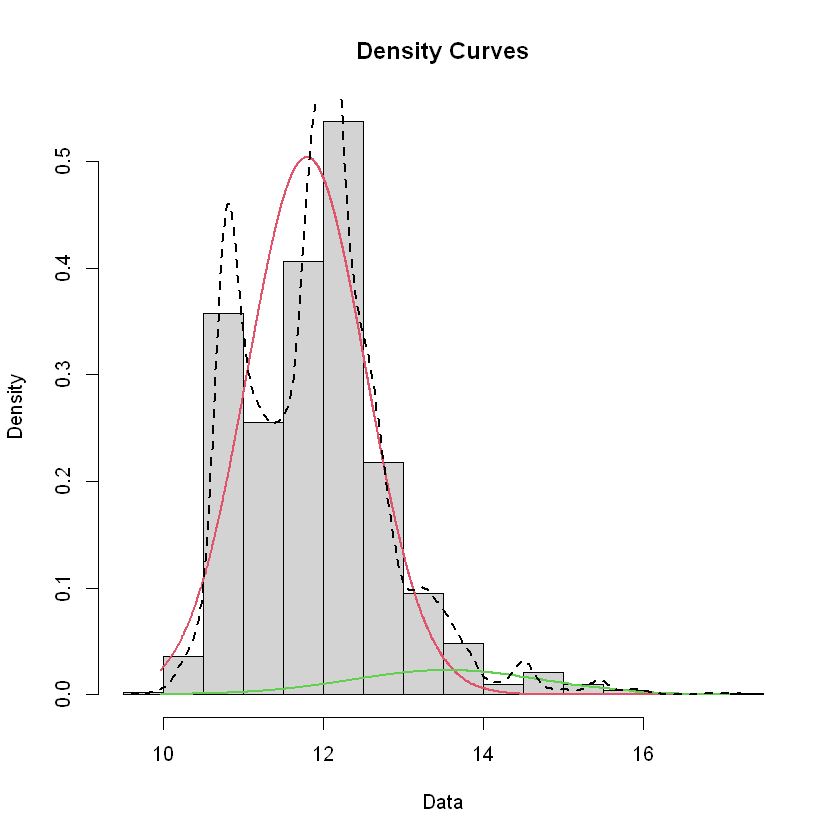

In [24]:
plot(mixmdl, which=2)
lines(density(log(df2$executionGas)), lty=2,lwd=2)

In [19]:
mixmdl = normalmixEM(log(df$executionGas), k=3, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 5024.79  log-lik = -22171.3 
             [,1]       [,2]       [,3]
lambda  0.3510747  0.3552248  0.2937005
mu     10.5172598 11.8829624 12.0727072
sigma   0.5055024  0.3478269  1.3353462
iteration = 2  log-lik diff = 562.5712  log-lik = -21608.73 
             [,1]       [,2]       [,3]
lambda  0.3583767  0.3422002  0.2994231
mu     10.4141958 11.9885413 12.1785059
sigma   0.4966804  0.3591319  1.2108717
iteration = 3  log-lik diff = 81.60799  log-lik = -21527.12 
             [,1]       [,2]       [,3]
lambda  0.3643523  0.3418950  0.2937527
mu     10.3861924 12.0348248 12.2044222
sigma   0.4902443  0.3623964  1.1765529
iteration = 4  log-lik diff = 15.11002  log-lik = -21512.01 
             [,1]       [,2]       [,3]
lambda  0.3670772  0.3433711  0.2895518
mu     10.3812212 12.0563814 12.2090258
sigma   0.4885858  0.3637150  1.1686011
iteration = 5  log-lik diff = 3.997723  log-lik = -21508.02 
            [,1]       [,2]      [,3]
lambda  0.368640  0

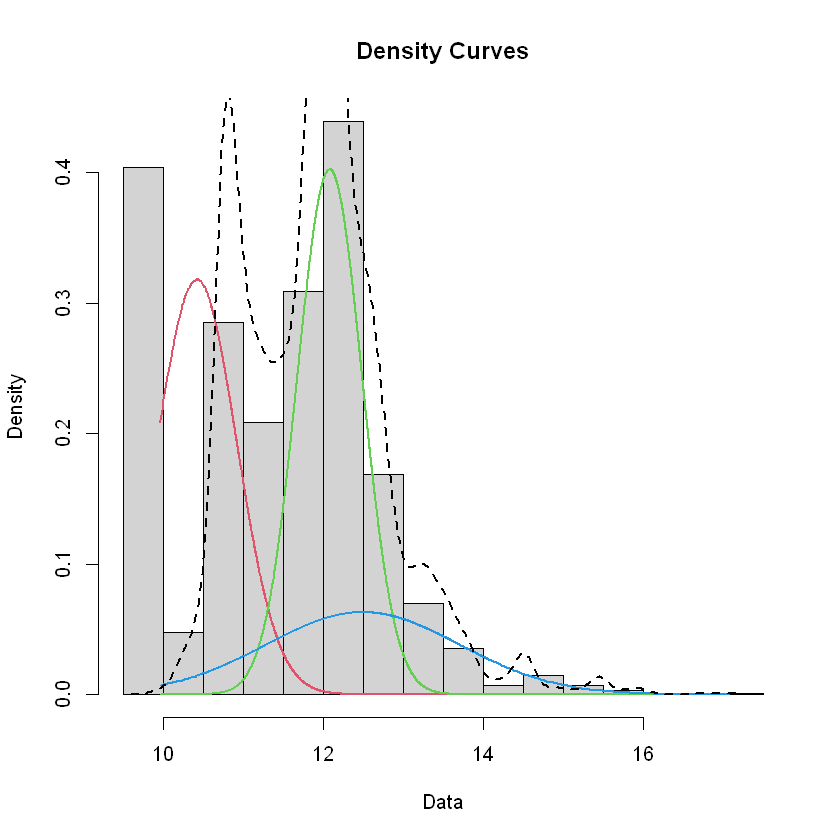

In [20]:
plot(mixmdl, which=2)
lines(density(log(df2$executionGas)), lty=2,lwd=2)

In [26]:
png(file="2mixturenormExeGaswithoutzerocalldata.png")
plot(mixmdl, which=2)
lines(density(log(df2$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2

In [27]:
head(df)

,blockNumber,gas,gasPrice,executionGas,callDataUsage,callDataLength,nonce,to,from,callDataUsageGroups
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
1,15627832,517689,57000000000,515877,1812,458,7235,6.973232e+47,6.994384e+47,Other
2,15627832,517689,57000000000,515865,1824,458,3140,6.973232e+47,3.915221e+47,1824
3,15627832,150000,30000000000,149356,644,138,11173680,7.785650e+47,1.436920e+48,Other
4,15627832,71000,23214786296,71000,0,2,5293,4.956288e+47,4.956288e+47,0
5,15627832,500000,20000000000,498176,1824,458,1,6.973232e+47,4.249540e+47,1824
6,15627832,469802,14090000000,458886,10916,2250,371,6.791231e+47,9.806636e+47,Other


## Distribution without horizontal of 0 call data and ex.Gas=1997940

In [39]:
df3 <- df2[(df2$executionGas!=1997940),]

## Mixture Normal for Execution Gas

In [41]:
mixmdl = normalmixEM(log(df3$executionGas), k=2, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 5956.164  log-lik = -14328.38 
             [,1]       [,2]
lambda  0.4724981  0.5275019
mu     11.4162022 12.2700612
sigma   0.7799361  0.9882132
iteration = 2  log-lik diff = 236.3698  log-lik = -14092.01 
             [,1]       [,2]
lambda  0.4891640  0.5108360
mu     11.5436001 12.2319724
sigma   0.6847847  0.9614142
iteration = 3  log-lik diff = 35.967  log-lik = -14056.04 
             [,1]       [,2]
lambda  0.5103256  0.4896744
mu     11.5783707 12.2284425
sigma   0.6576504  0.9783565
iteration = 4  log-lik diff = 17.44961  log-lik = -14038.59 
             [,1]       [,2]
lambda  0.5308025  0.4691975
mu     11.5996271 12.2339270
sigma   0.6504499  0.9961087
iteration = 5  log-lik diff = 14.36147  log-lik = -14024.23 
             [,1]       [,2]
lambda  0.5512807  0.4487193
mu     11.6165727 12.2424168
sigma   0.6499437  1.0112994
iteration = 6  log-lik diff = 13.52794  log-lik = -14010.7 
            [,1]      [,2]
lambda  0.571816  0.428184
mu 

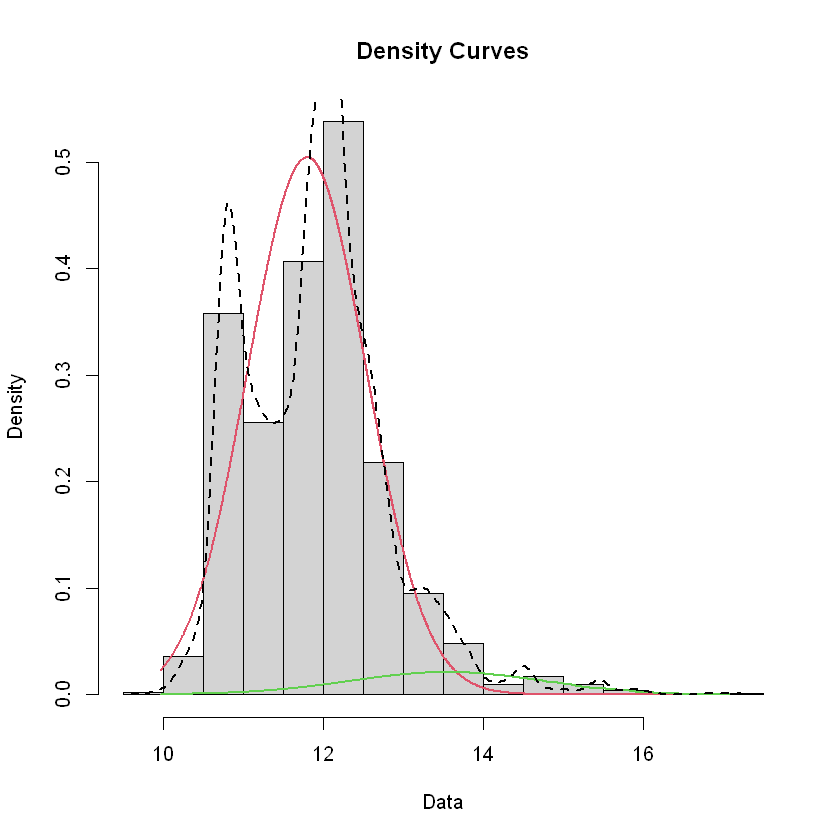

In [42]:
plot(mixmdl, which=2)
lines(density(log(df3$executionGas)), lty=2,lwd=2)

In [43]:
png(file="2mixturenormExeGaswithoutzerocalldataandexGas1997940.png")
plot(mixmdl, which=2)
lines(density(log(df2$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2

In [45]:
df4 <- df[(df$executionGas!=1997940) &(df$callDataUsageGroups=='Other'),]

In [46]:
mixmdl = normalmixEM(log(df4$executionGas), k=2, epsilon = 1e-08, maxit = 1000, maxrestarts=20, verb = TRUE, fast=FALSE, ECM = FALSE, arbmean = TRUE, arbvar = TRUE)

iteration = 1  log-lik diff = 10118.44  log-lik = -13309.92 
             [,1]       [,2]
lambda  0.5005833  0.4994167
mu     11.2154690 12.4190535
sigma   1.1020748  0.4318611
iteration = 2  log-lik diff = 786.2737  log-lik = -12523.65 
             [,1]       [,2]
lambda  0.5791313  0.4208687
mu     11.6343939 12.3245580
sigma   1.0738499  0.4306961
iteration = 3  log-lik diff = 228.1225  log-lik = -12295.53 
             [,1]       [,2]
lambda  0.6369823  0.3630177
mu     11.7687259 12.2549663
sigma   1.0518639  0.4066111
iteration = 4  log-lik diff = 115.0354  log-lik = -12180.49 
           [,1]      [,2]
lambda  0.67524  0.324760
mu     11.82689 12.210303
sigma   1.03906  0.373472
iteration = 5  log-lik diff = 77.32877  log-lik = -12103.16 
             [,1]       [,2]
lambda  0.7008818  0.2991182
mu     11.8560156 12.1837805
sigma   1.0309386  0.3383071
iteration = 6  log-lik diff = 55.81198  log-lik = -12047.35 
             [,1]       [,2]
lambda  0.7183315  0.2816685
mu     1

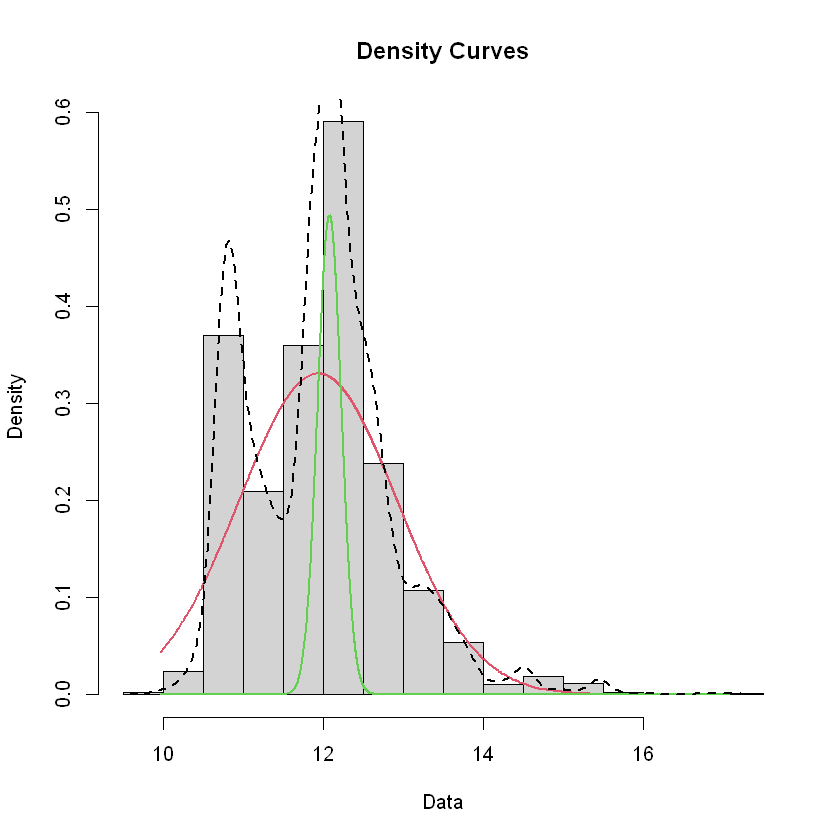

In [47]:
plot(mixmdl, which=2)
lines(density(log(df4$executionGas)), lty=2,lwd=2)

In [48]:
png(file="2mixturenormExeGaswithoutalllines.png")
plot(mixmdl, which=2)
lines(density(log(df2$executionGas)), lty=2,lwd=2)
dev.off()

png 
  2